In [12]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('clean_comment.csv')

# Define preprocessing function
def preprocess_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return ' '.join(words)

# Apply preprocessing
df['Cleaned Text'] = df['Comment Text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chummy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chummy\AppData\Roaming\nltk_data...


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned Text'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum TF-IDF scores for each word
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_scores_df = pd.DataFrame({'word': feature_names, 'score': tfidf_scores})
tfidf_scores_df = tfidf_scores_df.sort_values(by='score', ascending=False).head(10)

# Print top 10 TF-IDF keywords
print("Top 10 TF-IDF Keywords:")
print(tfidf_scores_df)

Top 10 TF-IDF Keywords:
              word        score
2162           hey  3084.167118
5712           use  2901.705244
4018         pleas  2730.907457
4942          skin  2294.854796
601   beminimalist  2251.669403
4167       product  2217.592635
1426            dm  2040.323460
5422         thank  1746.749787
2148          help  1720.575736
4769         serum  1653.921106


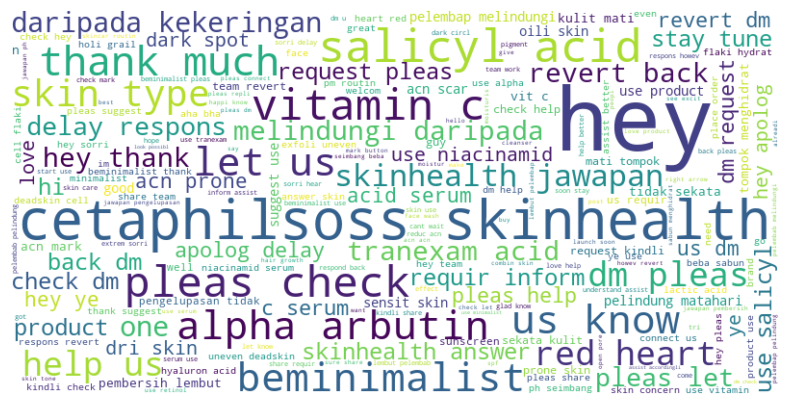

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [4]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, feature_names, 10)


Topic 1:
dm check pleas hey revert beminimalist help kindli repli request
Topic 2:
use product welcom beminimalist hair ye serum appli good day
Topic 3:
skinhealth cetaphilsoss answer olay kekeringan daripada melindungi heart order red
Topic 4:
use skin acid acn serum niacinamid salicyl vitamin alpha beminimalist
Topic 5:
hey thank know product love share sunscreen pleas launch soon


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chummy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 15.5 MB/s eta 0:00:01
     --- ------------------------------------ 1.1/12.8 MB 14.2 MB/s eta 0:00:01
     ------ --------------------------------- 2.2/12.8 MB 17.8 MB/s eta 0:00:01
     ---------- ----------------------------- 3.3/12.8 MB 18.9 MB/s eta 0:00:01
     ----------- ---------------------------- 3.8/12.8 MB 18.9 MB/s eta 0:00:01
     ------------------ --------------------- 6.1/12.8 MB 22.8 MB/s eta 0:00:01
     ---------------------- ----------------- 7.1/12.8 MB 22.8 MB/s eta 0:00:01
     ------------------------- -------------- 8.3/12.8 MB 23.0 MB/s eta 0:00:01
     ---------------------------- ----------- 9.1/12.8 MB 21.5 MB/s eta 0:00:01
     ------------------------------- ------- 10.4/12.8 MB 23.4 MB/s eta 0:00:01
     ----------------------------------- --- 11.6/12.8 MB 26.2 MB/s eta 0:00:01
     ------------------------------------- - 12.


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import spacy

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

# Apply the function to the 'Comment Text' column
df['Entities'] = df['Comment Text'].apply(extract_entities)

# Explode the entities and get the value counts
entities = df['Entities'].explode().value_counts().head(10)

# Print the top 10 entities
print("Top 10 Entities by NER:")
print(entities)


Top 10 Entities by NER:
Entities
(2, CARDINAL)          3282
(3, CARDINAL)          2575
(1, CARDINAL)          2256
(4, CARDINAL)          2004
(5, CARDINAL)          1852
(10, CARDINAL)         1453
(one, CARDINAL)        1292
(daily, DATE)           646
(first, ORDINAL)        634
(2 tidak, QUANTITY)     590
Name: count, dtype: int64
